# **Data Scientist Employee Attrition - Job Change of Data Scientists**

### **Problem Statement**

A company that is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses conducted by the company. Many people sign up for their training. The company wants to know which of these candidates want to work for the company after training or looking for new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education and experience is provided by candidates during signup and enrollment.

This dataset is designed to understand the factors that lead a person to leave their current job, and it is hence useful for HR research. By building a model that uses the current credentials, demographics, and work experience related data, you will predict the probability that a candidate is looking for a new job, as well as interpret the main factors that affect an employee's decision whether to continue or attrite.

### **Data Description**

* **Enrollee_id:** Unique ID for candidate
* **City:** City code
* **City_development_index:** Developement index of the city (scaled)
* **Gender:** Gender of candidate
* **Relevent_experience:** Relevant experience of candidate
* **Enrolled_university:** Type of University course enrolled if any
* **Education_level:** Education level of candidate
* **Major_discipline:** Education major discipline of candidate
* **Experience:** Candidate total experience in years
* **Company_size:** No of employees in current employer's company
* **Company_type:** Type of current employer
* **Last_new_job:** Difference in years between previous job and current job
* **Training_hours:** training hours completed
* **Target:** 0 – Not looking for job change, 1 – Looking for a job change

## **Introductory Steps**

### Importing Libraries

In [2]:
pip install scikeras


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


The code was executed after downgrading to version 1.2.2, hence it's advisable to downgrade to avoid potential unnecessary issues. After installing scikit-learn, restart the session then follow below steps.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

### Loading the Data

In [5]:
# Loeading the data. Fill the blank with the file path of the csv file
Data = pd.read_csv('./Data.csv')

In [6]:
# Checking the number of rows and columns in the data
Data.shape

(19158, 14)

* The dataset has 19158 rows and 14 columns

### Data Overview

In [7]:
# Let's view the first 5 rows of the data
Data.head()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [8]:
# Let's view the last 5 rows of the data
Data.tail()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0


In [9]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Enrollee_id             19158 non-null  int64  
 1   City                    19158 non-null  object 
 2   City_development_index  19158 non-null  float64
 3   Gender                  14650 non-null  object 
 4   Relevent_experience     19158 non-null  object 
 5   Enrolled_university     18772 non-null  object 
 6   Education_level         18698 non-null  object 
 7   Major_discipline        16345 non-null  object 
 8   Experience              19093 non-null  object 
 9   Company_size            13220 non-null  object 
 10  Company_type            13018 non-null  object 
 11  Last_new_job            18735 non-null  object 
 12  Training_hours          19158 non-null  int64  
 13  Target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

* There are 19,158  observations and 14 columns in the data.
* 10 columns are of the object datatype and 4 columns are numerical.


In [10]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [11]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

Enrollee_id                0.00
City                       0.00
City_development_index     0.00
Gender                    23.53
Relevent_experience        0.00
Enrolled_university        2.01
Education_level            2.40
Major_discipline          14.68
Experience                 0.34
Company_size              30.99
Company_type              32.05
Last_new_job               2.21
Training_hours             0.00
Target                     0.00
dtype: float64

In [12]:
Data["Target"].value_counts(1)

Target
0    0.750652
1    0.249348
Name: proportion, dtype: float64

In [13]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
City_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
Training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
Target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


Outside of the Enrollee_id (an ID column) and the Target variable, there are only two numerical columns in the dataset.

* The maximum number of training hours is 336, but at least 75% of employees had finished their training within 88 hours.
* 50% of the rows have a city development index between 0.903 and 0.949, so the dataset is weighted towards the higher side with respect to this column.


In [14]:
# Let's check the number of unique values in each column
Data.nunique()

Enrollee_id               19158
City                        123
City_development_index       93
Gender                        3
Relevent_experience           2
Enrolled_university           3
Education_level               5
Major_discipline              6
Experience                   22
Company_size                  8
Company_type                  6
Last_new_job                  6
Training_hours              241
Target                        2
dtype: int64

* Each value of the column 'Employee_id' is a unique identifier for an employee. Hence we can drop this column as it will not add any predictive power or value to the model.
* The 'City' column has 123 unique categories.

In [15]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in City are :
City
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64
**************************************************
Unique values in Relevent_experience are :
Relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
**************************************************
Unique values in Enrolled_university are :
Enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
**************************************************
Unique values in Education_level are :
Education_level
Graduate          11598
Masters            4361
H

* The 'City' column has 123 unique categories, and the city with the highest number of employees is City 103.
* Over 90% of the employees in this dataset are males, so it is highly gender-skewed.
* Most of the employees (~70%) have relevant experience in Data Science.
* 70% of the employees did not enroll in any of the courses.
* Most of the employees have a Bachelor's level of education (Graduation) but not more than that (~62% of the total number of employees). There are very few employees with Master's degrees and PhDs.
* Almost all the employees have previous experience (Related and Non-Related).
* ~75% of the employees are from private companies.

### Data Pre-processing

In [16]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns="Enrollee_id", inplace=True)

## **EDA**

### Univariate Analysis

In [17]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
Data.dtypes

City                       object
City_development_index    float64
Gender                     object
Relevent_experience        object
Enrolled_university        object
Education_level            object
Major_discipline           object
Experience                 object
Company_size               object
Company_type               object
Last_new_job               object
Training_hours              int64
Target                      int64
dtype: object

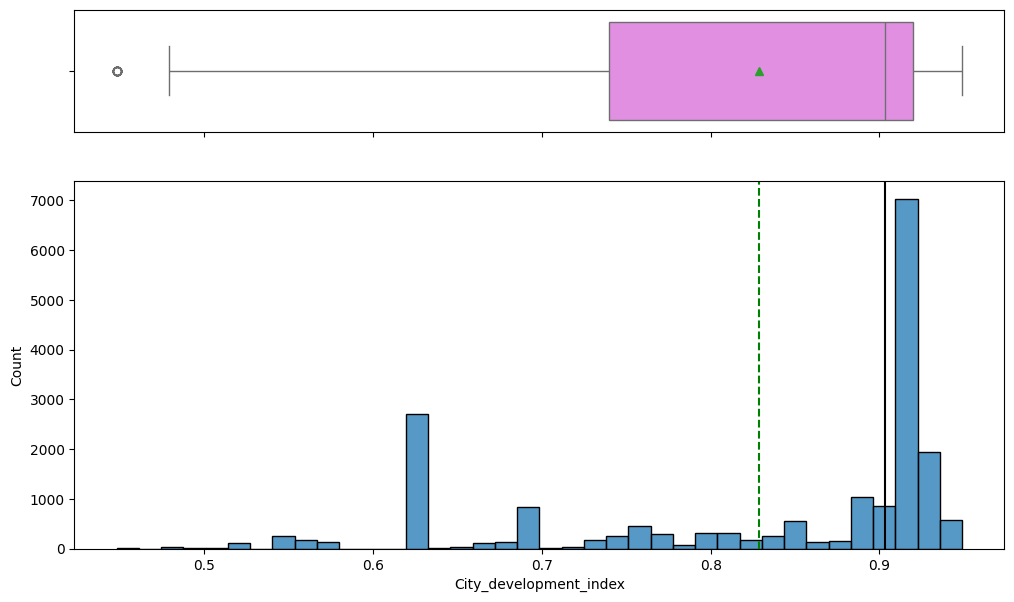

In [19]:
histogram_boxplot(Data, "City_development_index")

* From the above plot, we observe that there are many people from cities having a development index more than 0.9.

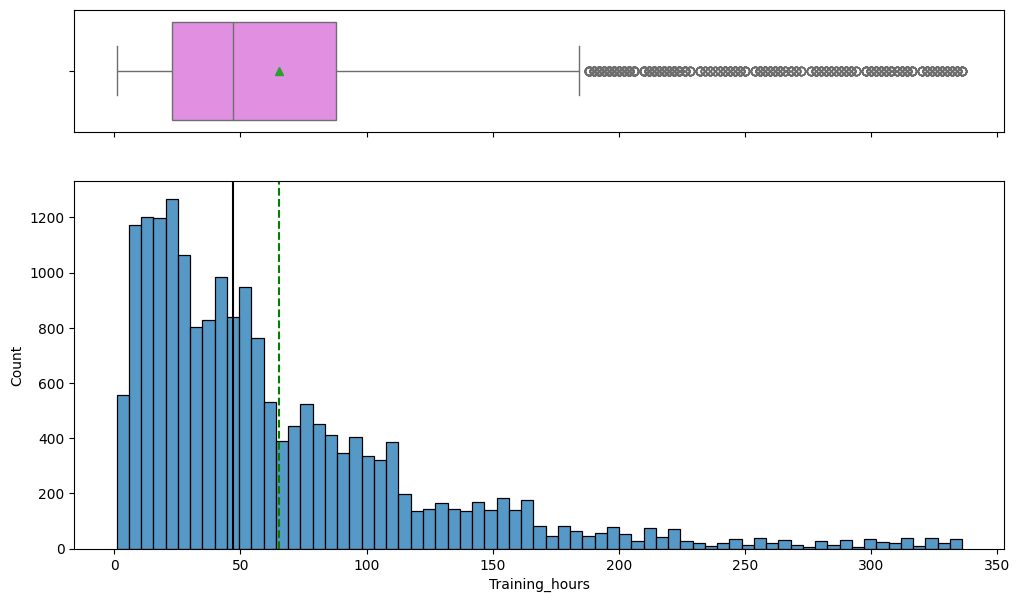

In [20]:
histogram_boxplot(Data, "Training_hours")

* From the plot, we observe that the measures of central tendency with respect to training hours seem to be 70, despite a maximum value over 300 hours. So most of the people in this dataset have undergone traning for less than 100 hours.

In [21]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

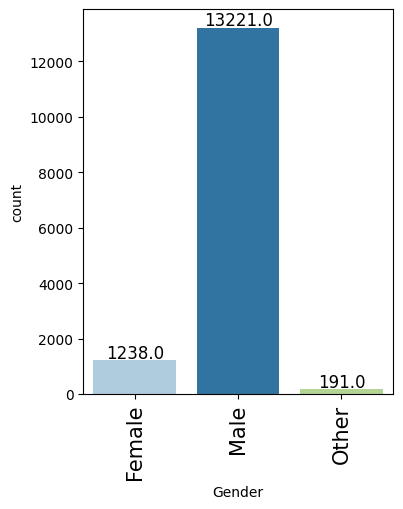

In [22]:
labeled_barplot(Data, "Gender")

* There are far more males in this dataset in comparison to females.
* Over 90% of this dataset is male, representing a highly gender-skewed dataset. This could be a limitation with respect to implementing this model in the real world, since gender balance is highly important to create machine learning models that are practically implemented on datasets related to people.

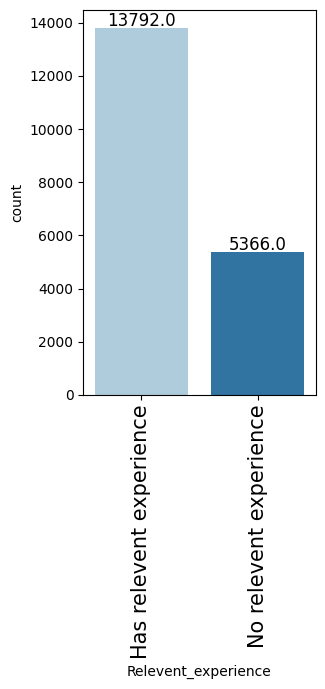

In [23]:
labeled_barplot(Data, "Relevent_experience")

* Most of the employees have relevant prior experience (~70%).
* 30% of the employees, however, have no relevant experience.

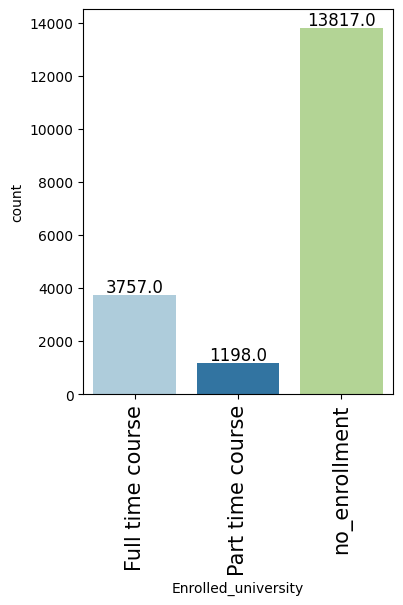

In [24]:
labeled_barplot(Data, "Enrolled_university")

* Most of the employees did not enroll in any of the courses.
* Approximately 20% of the employees have enrolled themselves in full-time courses.
* Only 6% have enrolled in part-time courses.

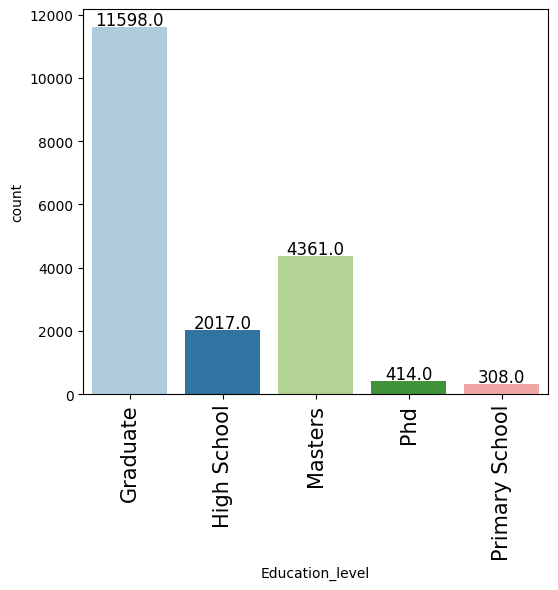

In [24]:
labeled_barplot(Data, "Education_level")

* Approximately 62% of employees have a Bachelor's (Graduate) level of education, but not more than that.
* Approx 23% of employees have a Master's degree as their highest level of education.
* There are very few employees (~1.5%) with only a High School level of education or below.

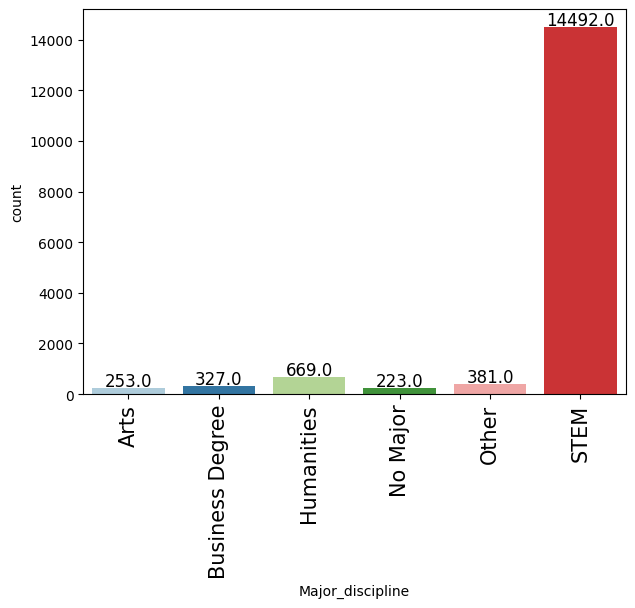

In [25]:
labeled_barplot(Data, "Major_discipline")

* Approximately 88% of employees have opted for STEM as their major discipline.

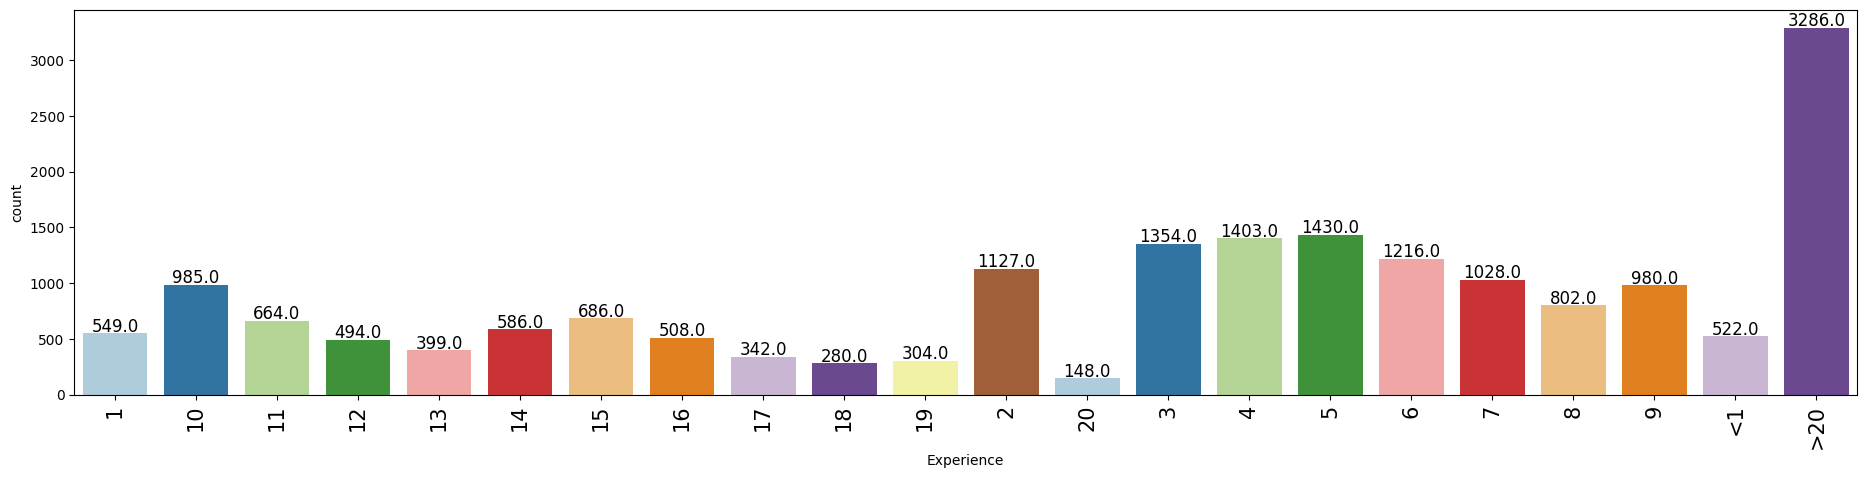

In [26]:
labeled_barplot(Data, "Experience")

* Approximately 17% of total employees have over 20 years of work experience.

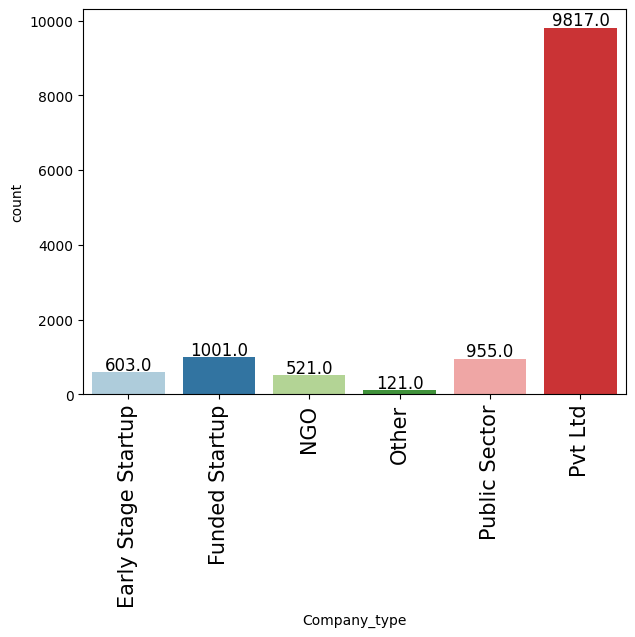

In [27]:
labeled_barplot(Data, "Company_type")

* Approximately 75% of the total employees are from a private limited company, showing the skew of the profile towards the private sector.

Target
0    14381
1     4777
Name: count, dtype: int64


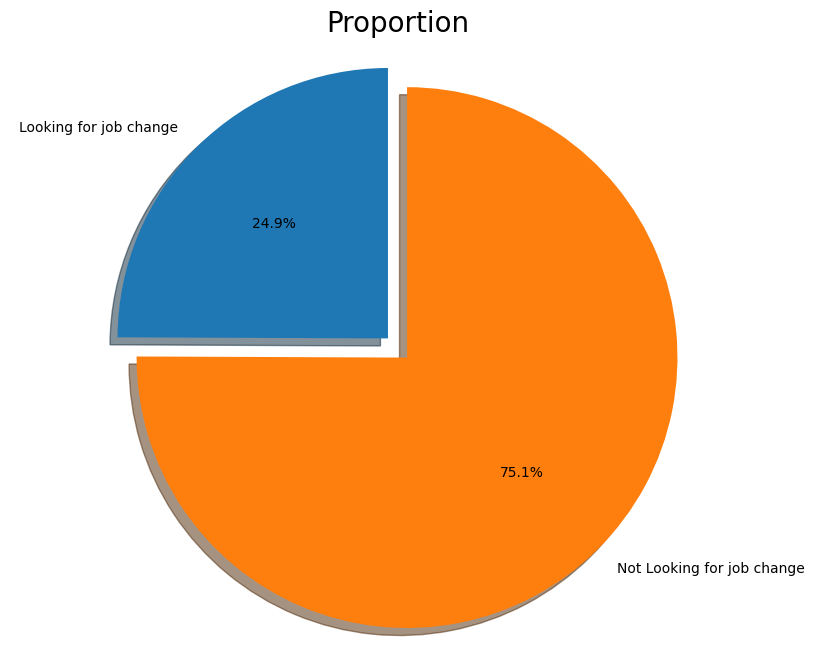

In [28]:
print(Data.Target.value_counts())
labels = 'Looking for job change', 'Not Looking for job change'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [Data.Target[Data['Target']==1].count(),Data.Target[Data['Target']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~25% of the employees in this dataset are actually looking for a job change.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

In [29]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

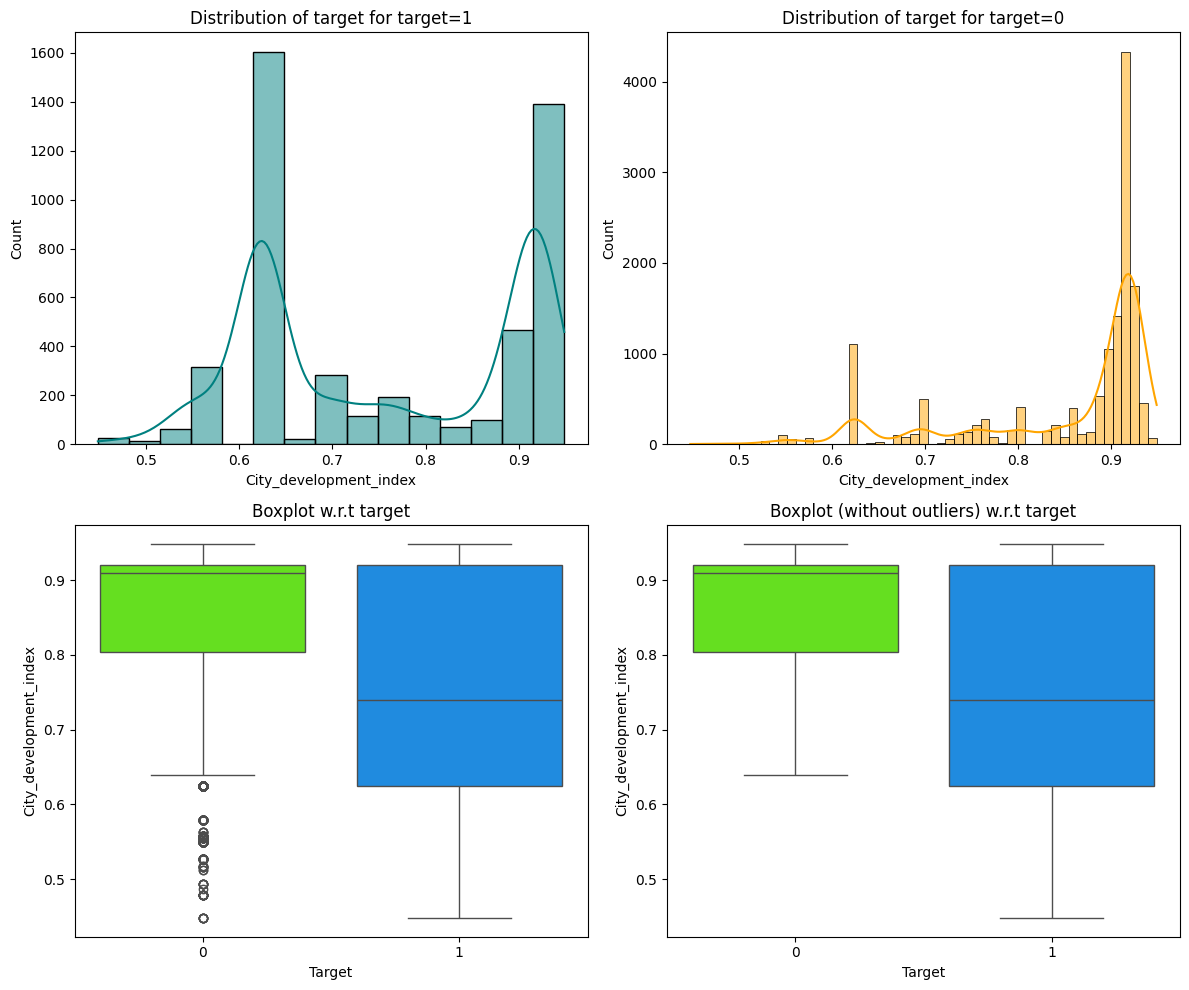

In [30]:
distribution_plot_wrt_target(Data, "City_development_index", "Target")

* From the above plot, we observe that employees from cities having a development index over 0.9, are not willing to switch their jobs.

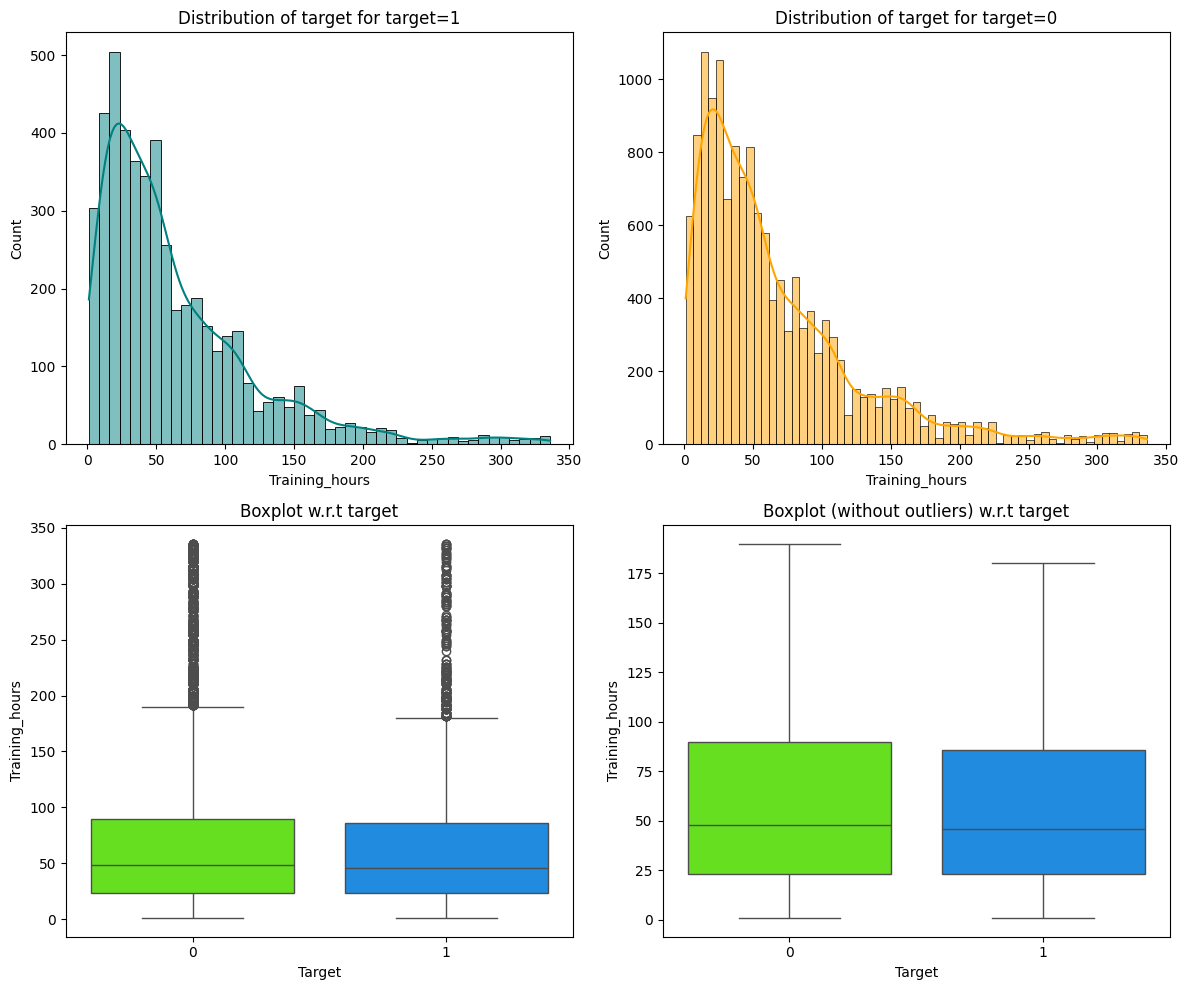

In [31]:
distribution_plot_wrt_target(Data, "Training_hours", "Target")

* We observe that the distribution of the training hours with respect to the target variable is rightly skewed, and from the box plot for both classes the median traning hours are around 50.

In [33]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Target      0     1    All
Gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


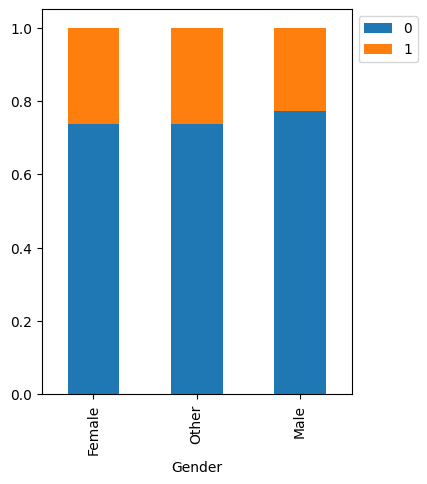

In [34]:
stacked_barplot(Data, "Gender", "Target")

* From the above plot, it is observed that the likelihood of the employee choosing a job switch does not depend on their gender.

Target                       0     1    All
Relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


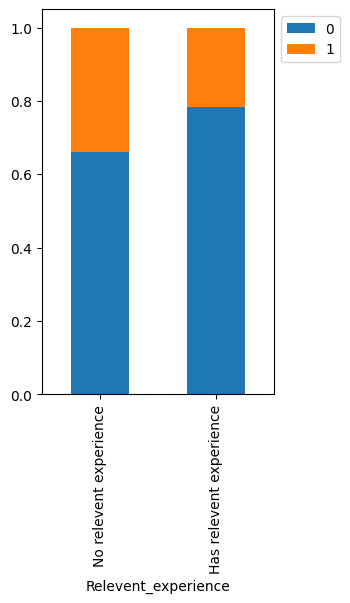

In [35]:
stacked_barplot(Data, "Relevent_experience", "Target")

* From the above plot, we see that employees from Non-relevant experience are more likely to be switching their job.

Target                   0     1    All
Enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


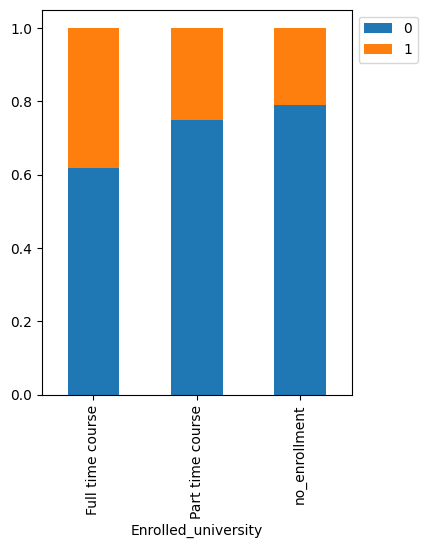

In [36]:
stacked_barplot(Data, "Enrolled_university", "Target")

* Employees who have taken full-time courses in universities are the ones who are more likely to be trying to switch jobs.

Target               0     1    All
Education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


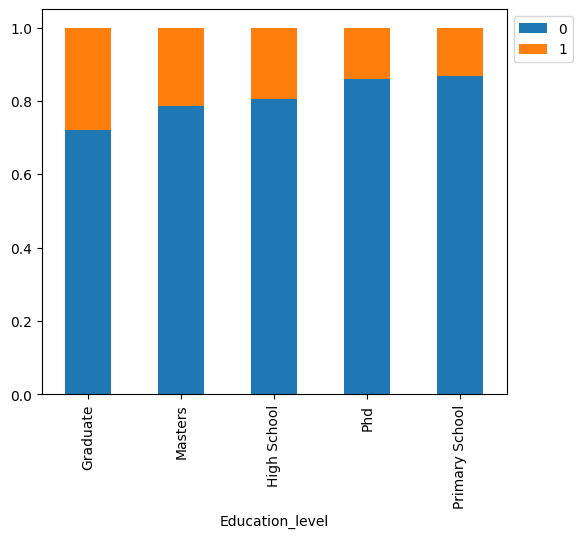

In [37]:
stacked_barplot(Data, "Education_level", "Target")

* Employees who completed Graduation and Master's degrees are more likely to be trying to switch their jobs.

Target                0     1    All
Major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


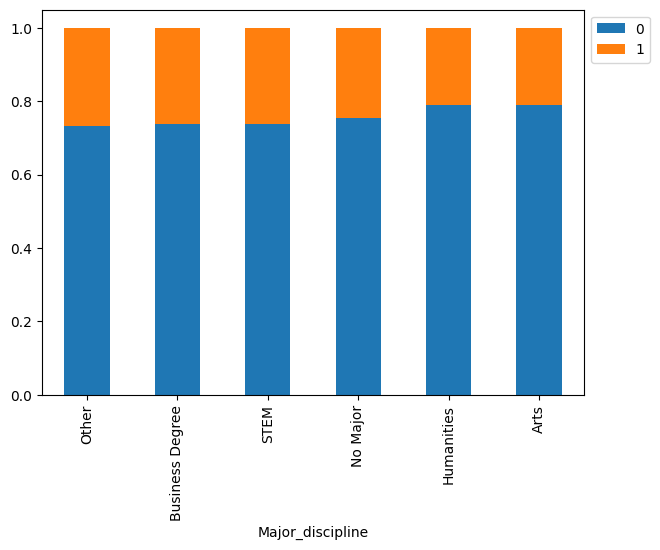

In [38]:
stacked_barplot(Data, "Major_discipline", "Target")

* Employees who took STEM or Business Degrees as their major discipline are slightly more likely to change their job.

Target          0     1    All
Experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


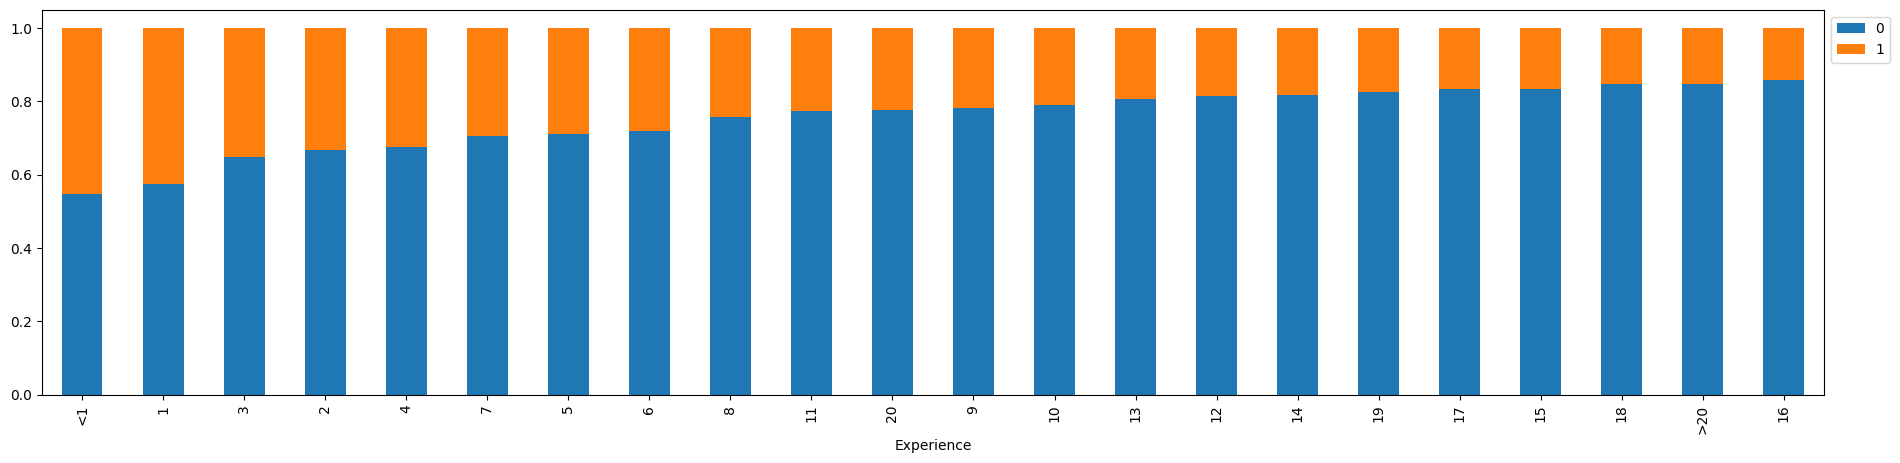

In [39]:
stacked_barplot(Data, "Experience", "Target")

* From the above plot, it's clear that employees having a work experience of less than 3 years are trying to switch their jobs.

Target            0     1    All
Last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


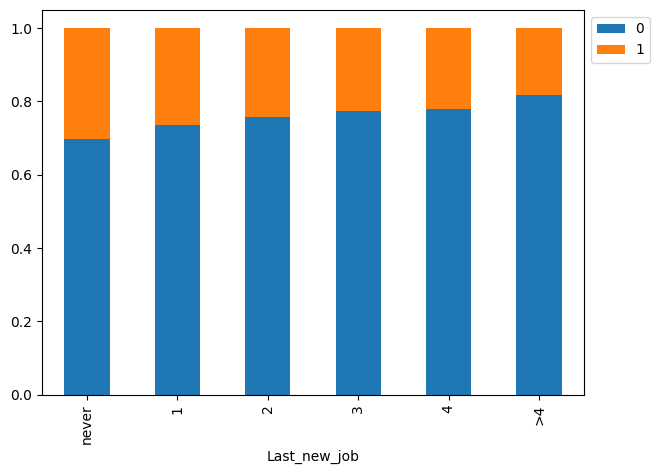

In [40]:
stacked_barplot(Data, "Last_new_job", "Target")

* Employees who have never switched their job before are the most likely to be looking for a job change.

In [41]:
###Dropping these columns as they will not add value to the modeling
Data.drop(['Company_size','Gender','City'], axis=1, inplace=True)

In [42]:
## Separating all the categorical columns for imputation
cat_col_df = Data.drop(['City_development_index','Training_hours','Target'], axis=1)

### Missing Value Imputation

* We will impute the missing values in columns using their mode.

In [43]:
## Separating Independent and Dependent Columns
X = Data.drop(['Target'],axis=1)
Y = Data[['Target']]

In [44]:
Y.head()

,Target
0,1
1,0
2,0
3,1
4,0


In [44]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [48]:
X_train.isnull().sum()

City_development_index    0
Relevent_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64

In [49]:
imputer_mode = SimpleImputer(strategy="most_frequent")
X_train[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]] = imputer_mode.fit_transform(
    X_train[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]])

X_test[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]] = imputer_mode.transform(
    X_test[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]])

In [50]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

City_development_index    0
Relevent_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64
------------------------------
City_development_index    0
Relevent_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64


### Encoding Categorical Columns

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder_RE = LabelEncoder()
X_train['Relevent_experience']= labelencoder_RE.fit_transform(X_train['Relevent_experience'])
X_test['Relevent_experience']= labelencoder_RE.transform(X_test['Relevent_experience'])

In [52]:
labelencoder_EN = LabelEncoder()
X_train['Enrolled_university'] =  labelencoder_EN.fit_transform(X_train['Enrolled_university'])
X_test['Enrolled_university'] =  labelencoder_EN.transform(X_test['Enrolled_university'])

In [53]:
labelencoder_EL = LabelEncoder()
X_train['Education_level']=  labelencoder_EL.fit_transform(X_train['Education_level'])
X_test['Education_level']=  labelencoder_EL.transform(X_test['Education_level'])

In [54]:
labelencoder_MD = LabelEncoder()
X_train['Major_discipline']=  labelencoder_MD.fit_transform(X_train['Major_discipline'])
X_test['Major_discipline']=  labelencoder_MD.transform(X_test['Major_discipline'])

In [55]:
labelencoder_EX = LabelEncoder()
X_train['Experience']=  labelencoder_EX.fit_transform(X_train['Experience'])
X_test['Experience']=  labelencoder_EX.transform(X_test['Experience'])

In [56]:
labelencoder_CT = LabelEncoder()
X_train['Company_type']=  labelencoder_CT.fit_transform(X_train['Company_type'])
X_test['Company_type']=  labelencoder_CT.transform(X_test['Company_type'])

In [57]:
labelencoder_LNJ = LabelEncoder()
X_train['Last_new_job']=  labelencoder_LNJ.fit_transform(X_train['Last_new_job'])
X_test['Last_new_job']=  labelencoder_LNJ.transform(X_test['Last_new_job'])

In [58]:
X_train.head()

,City_development_index,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_type,Last_new_job,Training_hours
17855,0.624,0,2,0,5,1,5,0,90
17664,0.920,1,2,4,5,15,5,5,15
13404,0.896,0,2,0,5,3,2,4,36
13366,0.920,0,2,0,5,15,1,0,53
15670,0.855,0,0,0,5,15,5,0,158


In [59]:
y_train.head()

,Target
17855,0
17664,0
13404,0
13366,0
15670,1


In [58]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15326, 9)
(3832, 9)
(15326, 1)
(3832, 1)


## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job, when he/she is not looking for it.
* Predicting an employee is not looking for a job, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employee (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


### Model 1

In [60]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [61]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 9, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [62]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7310 - loss: 0.8196 - val_accuracy: 0.7515 - val_loss: 0.6566
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.5729 - val_accuracy: 0.7515 - val_loss: 0.5971
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7521 - loss: 0.5669 - val_accuracy: 0.7515 - val_loss: 0.6093
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.5642 - val_accuracy: 0.7515 - val_loss: 0.5927
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.5610 - val_accuracy: 0.7515 - val_loss: 0.5955
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7524 - loss: 0.5593 - val_accuracy: 0.7515 - val_loss: 0.5941
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.5578 - val_accuracy: 0.7515 - val_loss: 0.5871
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7524 - loss: 0.5564 - val_accuracy: 0.

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7532 - loss: 0.5642


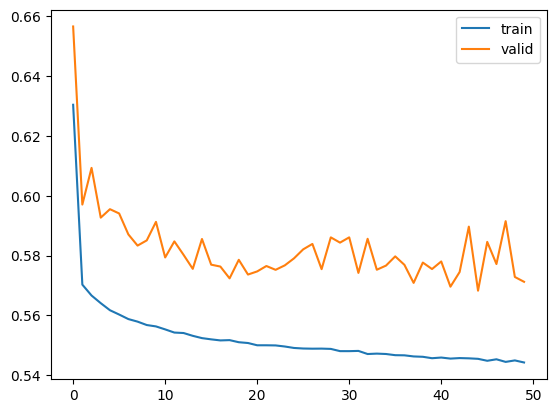

In [65]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

There is noise in the loss behavior here. Sometimes, the loss function fluctuates a lot during training, which makes the convergence slow. These fluctuations are due to the nature of Stochastic Gradient Descent that produces noisy updates in the parameters.

Let's check the other metrices.

In [66]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [68]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

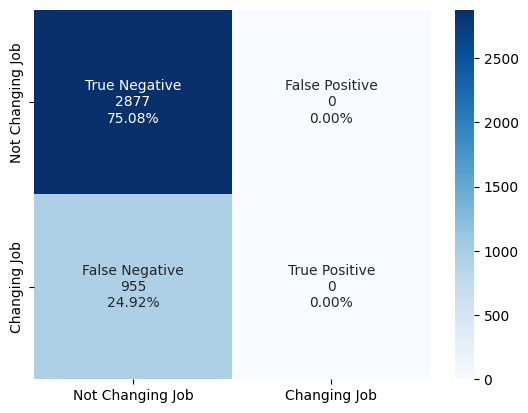

In [69]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Here, the 0% of False Positives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.

In [70]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2877
           1       0.00      0.00      0.00       955

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832



As you can see, the above model has a good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower.

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [71]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [72]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [73]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6695 - loss: 1.3905 - val_accuracy: 0.7355 - val_loss: 0.5785
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7176 - loss: 0.6413 - val_accuracy: 0.7394 - val_loss: 0.5564
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7314 - loss: 0.5969 - val_accuracy: 0.7505 - val_loss: 0.5416
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7339 - loss: 0.5923 - val_accuracy: 0.7515 - val_loss: 0.5454
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7399 - loss: 0.5748 - val_accuracy: 0.7531 - val_loss: 0.5524
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7456 - loss: 0.5683 - val_accuracy: 0.7511 - val_loss: 0.5893
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7425 - loss: 0.5671 - val_accuracy: 0.7511 - val_loss: 0.5861
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7491 - loss: 0.5472 - val_accuracy: 0.

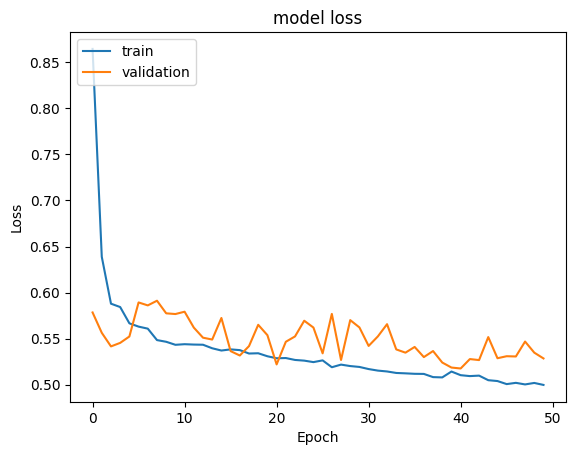

In [75]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for both train and validation.

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Best Threshold=0.229213, G-Mean=0.683


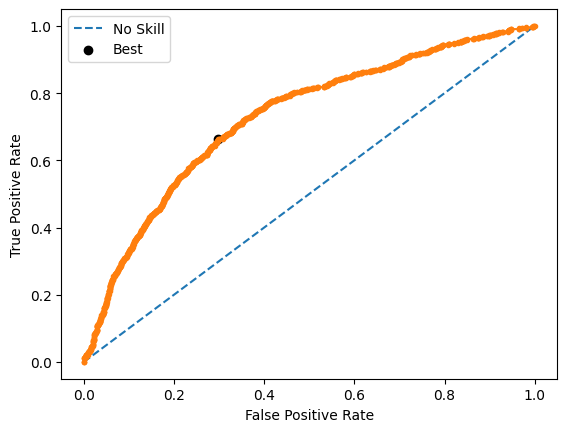

In [76]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(),

and select the threshold with the **largest G-Mean value.**

In [77]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

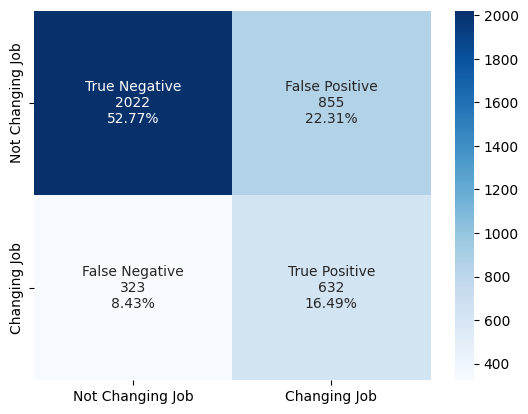

In [78]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [79]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2877
           1       0.43      0.66      0.52       955

    accuracy                           0.69      3832
   macro avg       0.64      0.68      0.65      3832
weighted avg       0.75      0.69      0.71      3832



As the number of layers in the neural network has increased, we can see that the macro F1 score has increased.

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score.

### Model 3

In [80]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [81]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [82]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [83]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [84]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6698 - loss: 0.6579 - val_accuracy: 0.7515 - val_loss: 0.5597
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7507 - loss: 0.5423 - val_accuracy: 0.7515 - val_loss: 0.5687
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7543 - loss: 0.5283 - val_accuracy: 0.7528 - val_loss: 0.5399
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7565 - loss: 0.5143 - val_accuracy: 0.7648 - val_loss: 0.5052
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7584 - loss: 0.5030 - val_accuracy: 0.7645 - val_loss: 0.5086
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7679 - loss: 0.4973 - val_accuracy: 0.7635 - val_loss: 0.5130
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7676 - loss: 0.4942 - val_accuracy: 0.7564 - val_loss: 0.5334
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7681 - loss: 0.4941 - val_accuracy: 0.

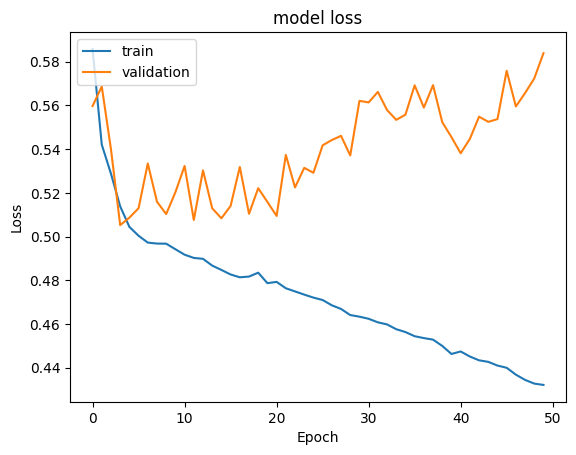

In [85]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a lot of noise in the model, and it and seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best Threshold=0.166696, G-Mean=0.671


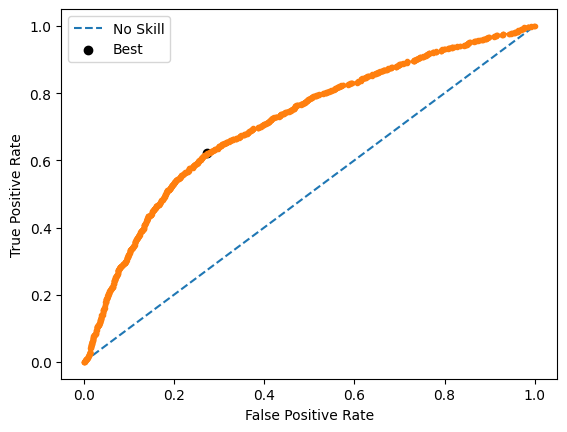

In [86]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [87]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

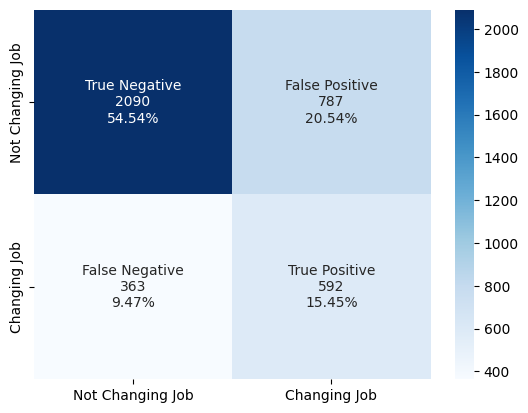

In [88]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [89]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      2877
           1       0.43      0.62      0.51       955

    accuracy                           0.70      3832
   macro avg       0.64      0.67      0.65      3832
weighted avg       0.75      0.70      0.72      3832



The Train and Validation curves seem to show overfitting despite having a good F1 score.

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.

### Model 4

In [90]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [91]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [92]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [94]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6772 - loss: 0.9054 - val_accuracy: 0.7515 - val_loss: 0.5659
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7495 - loss: 0.5810 - val_accuracy: 0.7515 - val_loss: 0.5585
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7501 - loss: 0.5672 - val_accuracy: 0.7515 - val_loss: 0.5526
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7523 - loss: 0.5568 - val_accuracy: 0.7515 - val_loss: 0.5441
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7519 - loss: 0.5550 - val_accuracy: 0.7515 - val_loss: 0.5437
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7520 - loss: 0.5545 - val_accuracy: 0.7515 - val_loss: 0.5429
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7521 - loss: 0.5494 - val_accuracy: 0.7515 - val_loss: 0.5396
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7521 - loss: 0.5472 - val_accuracy: 0.

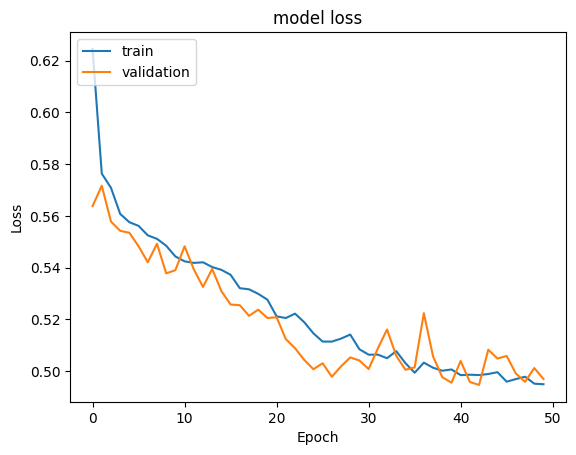

In [93]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both the curves train and validation are smooth.

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Threshold=0.265716, G-Mean=0.694


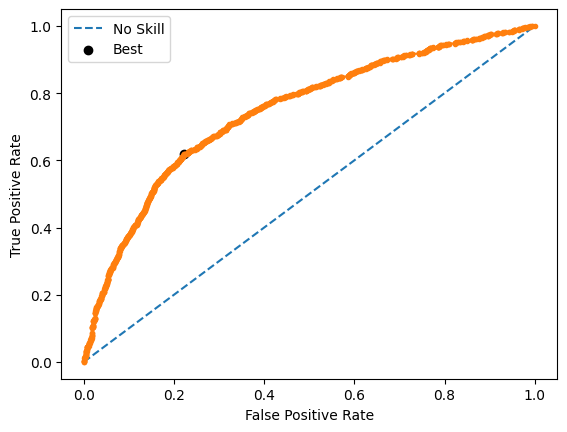

In [96]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [97]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

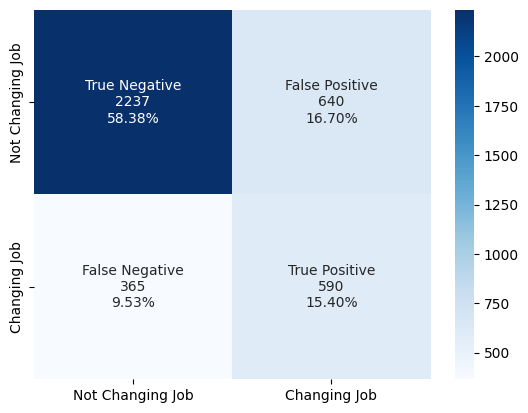

In [98]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [99]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2877
           1       0.48      0.62      0.54       955

    accuracy                           0.74      3832
   macro avg       0.67      0.70      0.68      3832
weighted avg       0.77      0.74      0.75      3832



The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score also seems to be fine, with a decrease in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [100]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [102]:
def create_model_v4():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [103]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, optimizer="Adam", verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_random = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [104]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Unexpected exception formatting exception. Falling back to standard exception


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\ecw3dq\dev\personal\MIT_Data_Science_Course\venv\lib\site-packages\joblib\externals\loky\process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Program Files\Python39\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute '_PassthroughScorer' on <module 'sklearn.metrics._scorer' from 'c:\\Users\\ecw3dq\\dev\\personal\\MIT_Data_Science_Course\\venv\\lib\\site-packages\\sklearn\\metrics\\_scorer.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\ecw3dq\dev\personal\MIT_Data_Science_Course\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ecw3dq\AppData\Local\Temp\

In [102]:
estimator_v4=create_model_v4()

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [103]:
optimizer = tf.keras.optimizers.Adam()
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
192/192 [==============================] - 2s 5ms/step - loss: 0.6414 - accuracy: 0.7316 - val_loss: 0.5798 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5813 - accuracy: 0.7496 - val_loss: 0.5842 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5700 - accuracy: 0.7494 - val_loss: 0.5637 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5643 - accuracy: 0.7502 - val_loss: 0.5583 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5619 - accuracy: 0.7503 - val_loss: 0.5593 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5574 - accuracy: 0.7503 - val_loss: 0.5598 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5536 - accuracy: 0.7502 - val_loss: 0.5454 - val_accuracy: 0.7515
Epoch 

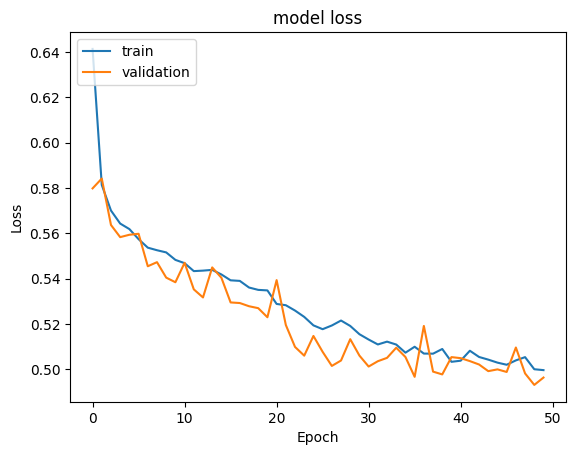

In [104]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the training behavior of the model.

120/120 [==============================] - 0s 2ms/step
Best Threshold=0.235663, G-Mean=0.707


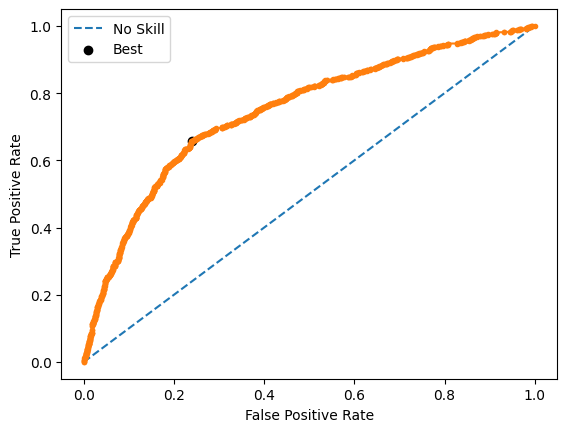

In [105]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [106]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

120/120 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

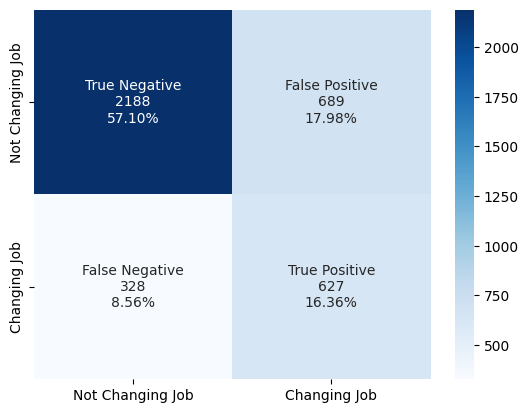

In [107]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [108]:
#Accuracy as per the classification report
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2877
           1       0.48      0.66      0.55       955

    accuracy                           0.73      3832
   macro avg       0.67      0.71      0.68      3832
weighted avg       0.77      0.73      0.75      3832



Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time.

Other hyperparameters can also be tuned to get better performance on the metrics.

Here, the F1 score of the model has decreased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration.

Let's use the more exhaustive Grid Search CV and see if the F1 score increases.

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [109]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [110]:
def create_model_v5():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**.

You can also optimize the other hyperparameters as mentioned above.

In [111]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, optimizer="Adam", verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [112]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
384/384 [==============================] - 4s 6ms/step - loss: 0.6308 - accuracy: 0.7337 - val_loss: 0.5739 - val_accuracy: 0.7515
Best: 0.750620 using {'batch_size': 32, 'optimizer__learning_rate': 0.01}
Total runtime of the program is 93.2235975265503


The best model has the following configuration:

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [113]:
estimator_v5=create_model_v5()

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [114]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['optimizer__learning_rate'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
192/192 [==============================] - 3s 5ms/step - loss: 0.6093 - accuracy: 0.7413 - val_loss: 0.5598 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5624 - accuracy: 0.7503 - val_loss: 0.5598 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5588 - accuracy: 0.7502 - val_loss: 0.5516 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5555 - accuracy: 0.7503 - val_loss: 0.5450 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5544 - accuracy: 0.7504 - val_loss: 0.5481 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 7ms/step - loss: 0.5573 - accuracy: 0.7503 - val_loss: 0.5630 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 8ms/step - loss: 0.5553 - accuracy: 0.7503 - val_loss: 0.5488 - val_accuracy: 0.7515
Epoch 

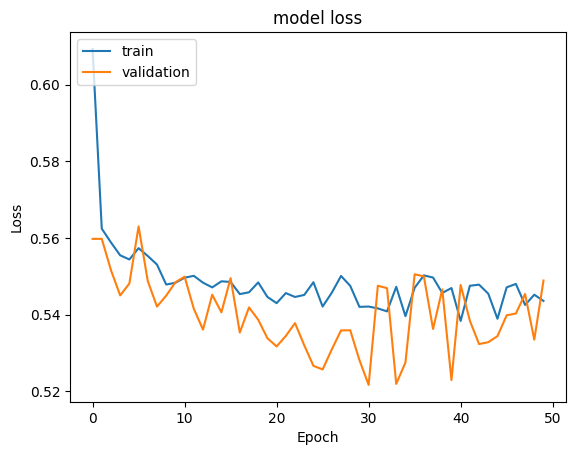

In [115]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, are smooth.

120/120 [==============================] - 0s 2ms/step
Best Threshold=0.258756, G-Mean=0.509


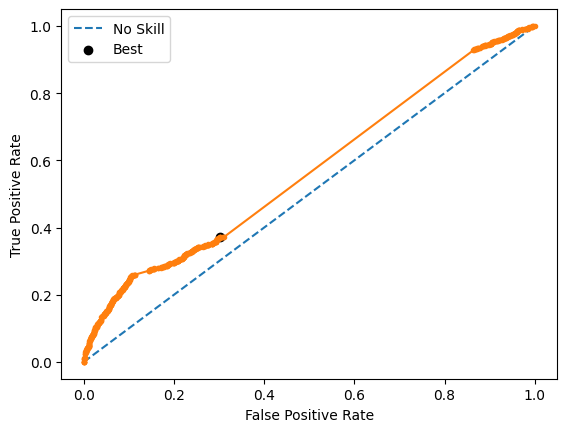

In [116]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [117]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

120/120 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

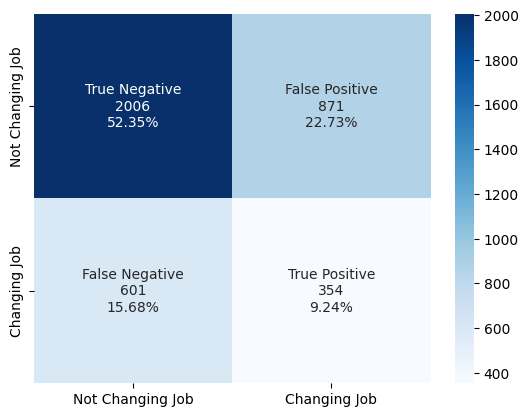

In [118]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [119]:
#Accuracy as per the classification report
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2877
           1       0.29      0.37      0.32       955

    accuracy                           0.62      3832
   macro avg       0.53      0.53      0.53      3832
weighted avg       0.65      0.62      0.63      3832



Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the F1 score of the model, while better than in Randomized Search, is slightly lower than in Model 4 (the Dropout model).

### Dask

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure.
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

You may install the Dask library in Anaconda prompt using the below code:
* !pip install dask-ml --user

In [120]:
# Try below code to install dask in Google Colab
!pip install dask-ml

In [121]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

Try to run the code twice if you encounter any error while improting Dask

* Dask is the same as regular Grid Search in its functioning.
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [122]:
def create_model_v6():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [123]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [124]:
import time

# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

384/384 [==============================] - 3s 5ms/step - loss: 0.6440 - accuracy: 0.7283 - val_loss: 0.5697 - val_accuracy: 0.7515
Best: 0.750620 using {'batch_size': 32, 'optimizer__learning_rate': 0.01}
Total runtime of the program is 86.2575147151947


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We can also use another optimization technique - Keras Tuner.

In [125]:
## Install Keras Tuner
!pip install keras-tuner

### Keras Tuner

In [126]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [127]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [128]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [129]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

Reloading Tuner from ./Job_/tuner0.json


In [130]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [131]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [132]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7516851425170898

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7514677047729492

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.7514677047729492

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7514677047729492

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 128
unit

### Model 7

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [133]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [134]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [135]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121345 (474.00 KB)
Trainable params: 12134

In [136]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [137]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 3s 6ms/step - loss: 1.1225 - accuracy: 0.7018 - val_loss: 0.5539 - val_accuracy: 0.7495
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5978 - accuracy: 0.7343 - val_loss: 0.5578 - val_accuracy: 0.7479
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5746 - accuracy: 0.7434 - val_loss: 0.5542 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5630 - accuracy: 0.7464 - val_loss: 0.5432 - val_accuracy: 0.7521
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5655 - accuracy: 0.7437 - val_loss: 0.5516 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5569 - accuracy: 0.7482 - val_loss: 0.5395 - val_accuracy: 0.7508
Epoch 7/50
192/192 [==============================] - 1s 5ms/step - loss: 0.5542 - accuracy: 0.7462 - val_loss: 0.5374 - val_accuracy: 0.7511
Epoch 

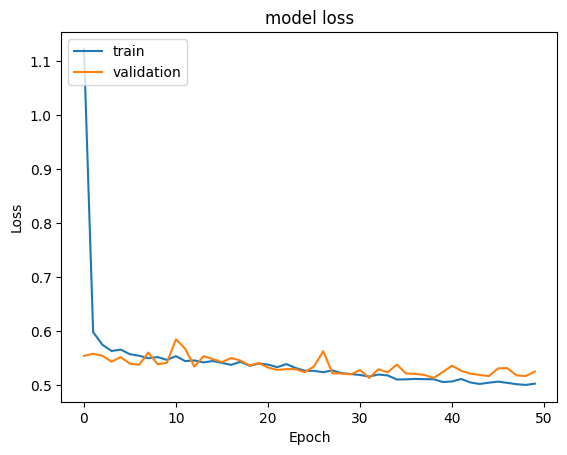

In [138]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves are smooth.

120/120 [==============================] - 0s 2ms/step
Best Threshold=0.232952, G-Mean=0.678


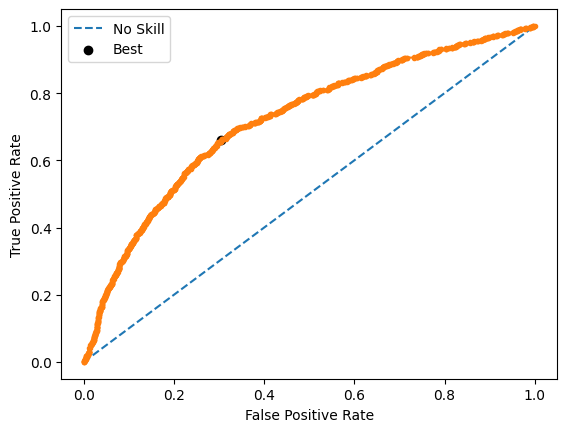

In [139]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [140]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

120/120 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

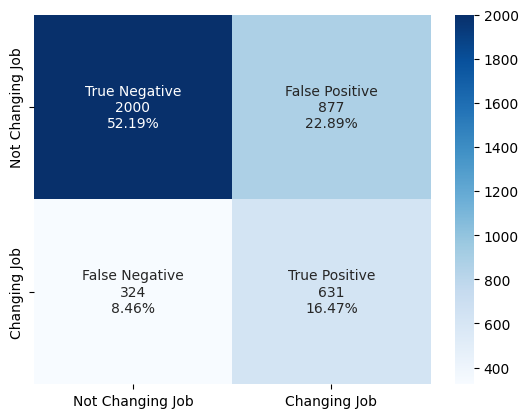

In [141]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm7,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [142]:
#Accuracy as per the classification report
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      2877
           1       0.42      0.66      0.51       955

    accuracy                           0.69      3832
   macro avg       0.64      0.68      0.64      3832
weighted avg       0.75      0.69      0.71      3832



* After using the suggested hyperparameters from Keras Tuner, the F1 score has slightly increased, and the False Negative rate is higher in comparison to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score.

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [143]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [144]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [145]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [146]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

Reloading Tuner from ./Job_Switch/tuner0.json


In [147]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [148]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

In [149]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.3924380640188853

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.3745472927888234

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.3596986730893453

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 224
units_6: 96
units_7: 128
units_8: 96
units_9: 32
Score: 0.27350427707036334

Trial 3 summary
Hyperparameters:
num_layers

In [150]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [151]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [152]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1600      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121345 (474.00 KB)
Trainable params: 12134

In [153]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
288/288 [==============================] - 4s 6ms/step - loss: 0.9404 - accuracy: 0.5938 - val_loss: 1.1380 - val_accuracy: 0.0674
Epoch 2/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6742 - accuracy: 0.6132 - val_loss: 0.8120 - val_accuracy: 0.3644
Epoch 3/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6514 - accuracy: 0.6346 - val_loss: 1.2521 - val_accuracy: 0.1171
Epoch 4/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6498 - accuracy: 0.6296 - val_loss: 0.6781 - val_accuracy: 0.6395
Epoch 5/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6404 - accuracy: 0.6382 - val_loss: 0.9168 - val_accuracy: 0.1921
Epoch 6/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6399 - accuracy: 0.6413 - val_loss: 0.9899 - val_accuracy: 0.1199
Epoch 7/50
288/288 [==============================] - 1s 5ms/step - loss: 0.6361 - accuracy: 0.6459 - val_loss: 0.8910 - val_accuracy: 0.2925
Epoch 

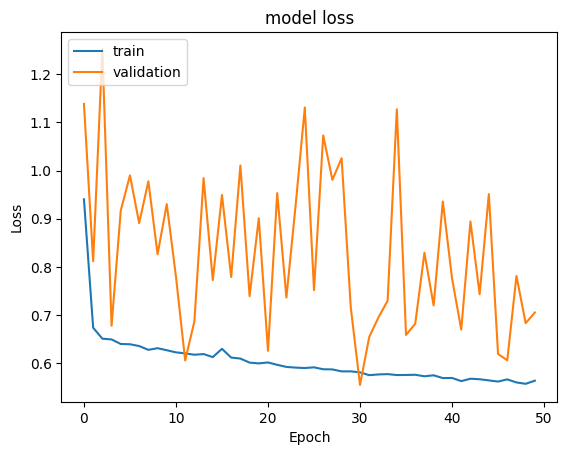

In [154]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

120/120 [==============================] - 0s 2ms/step
Best Threshold=0.442253, G-Mean=0.679


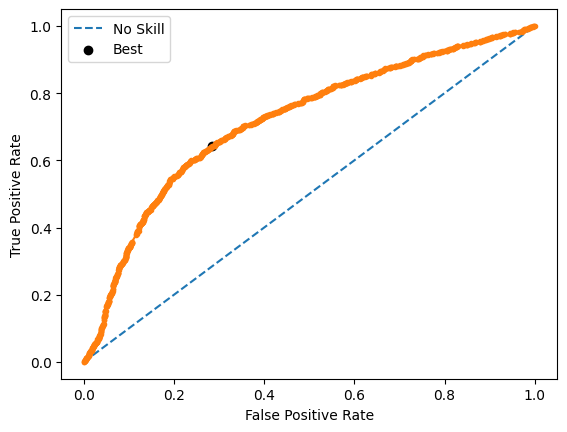

In [155]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [156]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

120/120 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

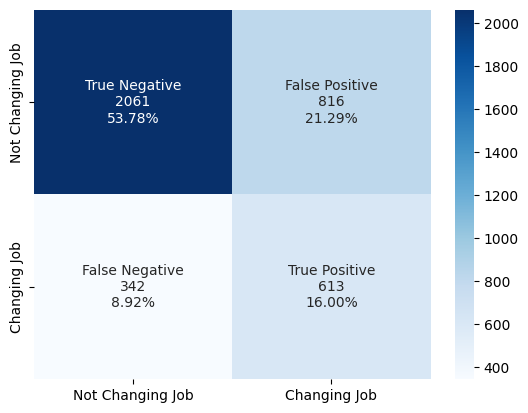

In [157]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm9,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [158]:
#Accuracy as per the classification report
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      2877
           1       0.43      0.64      0.51       955

    accuracy                           0.70      3832
   macro avg       0.64      0.68      0.65      3832
weighted avg       0.75      0.70      0.71      3832



After applying the SMOTE technique to the data, the F1 score increased, and the False Negative rate decreased, but if you see the loss curves of train and validation, the model seems to have overfit.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [159]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [160]:
def create_model_v7():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [161]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [162]:
# define the grid search parameters
batch_size= [32, 64, 128]
Learn_rate = [0.001,0.01,0.1]
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
384/384 [==============================] - 3s 5ms/step - loss: 0.6308 - accuracy: 0.7337 - val_loss: 0.5739 - val_accuracy: 0.7515


In [163]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.750620 using {'batch_size': 32, 'optimizer__learning_rate': 0.01}


In [164]:
estimator_v7=create_model_v7()

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [165]:
optimizer = tf.keras.optimizers.Adam()
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
576/576 [==============================] - 4s 5ms/step - loss: 0.7003 - accuracy: 0.6014 - val_loss: 0.8608 - val_accuracy: 0.0000e+00
Epoch 2/50
576/576 [==============================] - 4s 6ms/step - loss: 0.6665 - accuracy: 0.6224 - val_loss: 0.9427 - val_accuracy: 0.0000e+00
Epoch 3/50
576/576 [==============================] - 3s 5ms/step - loss: 0.6595 - accuracy: 0.6238 - val_loss: 0.8662 - val_accuracy: 0.0000e+00
Epoch 4/50
576/576 [==============================] - 3s 4ms/step - loss: 0.6542 - accuracy: 0.6246 - val_loss: 0.8600 - val_accuracy: 0.0000e+00
Epoch 5/50
576/576 [==============================] - 3s 4ms/step - loss: 0.6477 - accuracy: 0.6252 - val_loss: 0.8651 - val_accuracy: 0.0000e+00
Epoch 6/50
576/576 [==============================] - 3s 4ms/step - loss: 0.6400 - accuracy: 0.6319 - val_loss: 0.9245 - val_accuracy: 0.1034
Epoch 7/50
576/576 [==============================] - 4s 7ms/step - loss: 0.6341 - accuracy: 0.6440 - val_loss: 0.8075 - val_acc

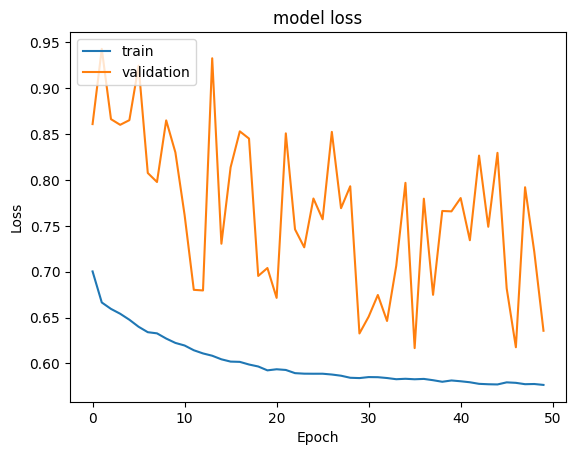

In [166]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model.

Grid Search CV also does not seem to work that well on the SMOTE data.

120/120 [==============================] - 0s 2ms/step
Best Threshold=0.497505, G-Mean=0.685


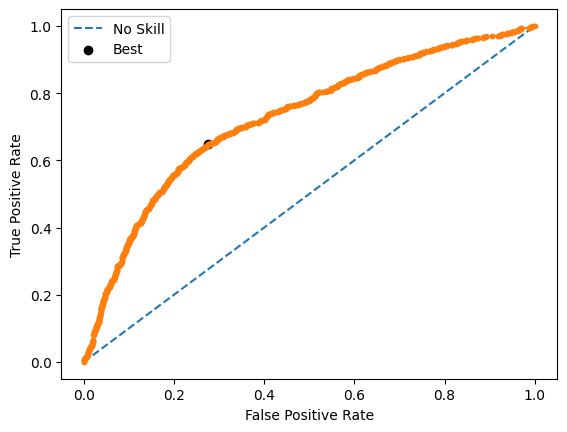

In [167]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [168]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

120/120 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

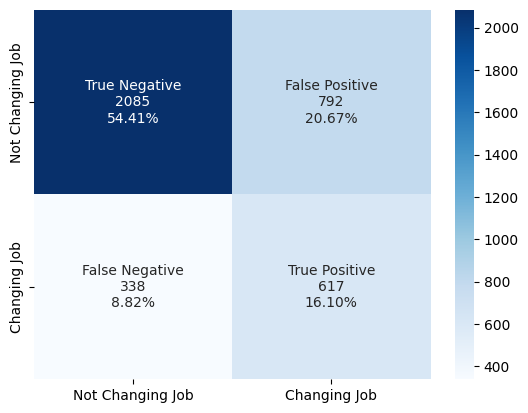

In [169]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm10,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [170]:
#Accuracy as per the classification report
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      2877
           1       0.44      0.65      0.52       955

    accuracy                           0.71      3832
   macro avg       0.65      0.69      0.65      3832
weighted avg       0.76      0.71      0.72      3832



Oversampling using SMOTE did not help improve the F1 score.

In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

So, our final model here can be **Model 4**, which uses the Dropout regularization technique and works on the imbalanced dataset.



### Suggested Areas of Improvement

* Build any one Machine Learning model, and use that to get the feature importance of the variables. Try to use that in the neural network model.

* You can try to do better feature engineerning by removing the flaws of the skewed variables if required.

### Business Recommendations

* The HR department of the company can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an employee is likely to switch jobs or not, and this process seems to be easier and more time-efficient than other methods.

The optimised model gives better results as seen from the confusion matrix as well as an improved F1 score.


We encourage you to further look to optimize the model and come up with better results.

## **Happy Learning!**